### ANN for regression, Cars Datasets

#### Imports / modules

In [1]:
# pip install scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

# pip install tensorflow
import tensorflow as tf
import keras
from keras import layers

#### Loading the dataset

In [2]:
# load the csv-file to pandas DataFrame
df = pd.read_csv("Cars_Cleaned_Dataset_2025.csv")

In [3]:
# quickly check the first few rows of data
# to see what we have here
df.head()

,Total Speed in km/h,CC/Battery Capacity in cc,HorsePower,Seats,Performance(0 - 100 )KM/H,Torque,Cars Prices,Fuel Types_CNG/Petrol,Fuel Types_Diesel,Fuel Types_Electric,...,Company Names_Mercedes,Company Names_Nissan,Company Names_Peugeot,Company Names_Porsche,Company Names_Rolls Royce,Company Names_Tata Motors,Company Names_Tesla,Company Names_Toyota,Company Names_Volkswagen,Company Names_Volvo
0,250.0,6749.0,563.0,5,5.3,900,460000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,250.0,3.0,630.0,4,3.2,900,161000.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,320.0,5.0,602.0,2,3.6,560,253290.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,341.0,3.0,710.0,2,2.9,770,499000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,314.0,3.0,656.0,2,3.6,685,193440.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### X/y-split

In [4]:
# perform X/y -split
# if you  have more than one independent variable, list them all here
# leave out the target variable! (dependent variable)

# this is a nice and common trick => everything EXCEPT target variable => support variable
X = df.drop("Cars Prices", axis=1)

# have only the target variable here (dependent variable)
y = df["Cars Prices"]

#### Train/test/validation -split

In [5]:
# in Classic ML, we only had train/test -split
# in deep learning, we usually use validation-data also, for better
# optimization possibilities and better metrics

# unfortunately the scikit-learn's train_test_split doesn't support validation
# set split in itself.

# if you want to split the test set into two for a validation set too, try this trick:

# step 1, split the data into 70% (training data) and 30% (temporary data)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3)

# step 2, split the temporary data in HALF (0.5) => 15% test and 15% validation
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

### Normalize and log transformation find by AI because my values were too high and can tend to go negatives to the predictions side

In [6]:
from sklearn.preprocessing import MinMaxScaler

# Scale X features
X_scaler = MinMaxScaler()
X_train_scaled = X_scaler.fit_transform(X_train)
X_val_scaled = X_scaler.transform(X_val)
X_test_scaled = X_scaler.transform(X_test)

# Scale y target (you already have this part)
y_train_log = np.log1p(y_train.values.reshape(-1, 1))
y_val_log = np.log1p(y_val.values.reshape(-1, 1))
y_test_log = np.log1p(y_test.values.reshape(-1, 1))


#### Create a neural network structure

In [7]:
# create neural network

# save the amount of support variables into a helper variable
# so we don't have to update the input_shape all the time
variable_amount = X_train_scaled.shape[1]

# Define Sequential neural network model
# input shape has to match the amount of SUPPORT VARIABLES
# in other words => amount of columns in X 
# Tip: have at least the same number of nodes as in the input shape
# output layer in regression is always 1 node without activation function
model = keras.Sequential(
    [
        layers.Dense(12, activation="relu", input_shape=(variable_amount,)),
        layers.Dense(32, activation="relu"),
        layers.Dense(16, activation="relu"),
        layers.Dense(1)
    ]
)

# select the optimizer and loss function
# you can try rmsprop also as optimizer, or stochastic gradient descent
model.compile(optimizer='adam', loss='mse')

# common tips on how to change neural network structure if your metrics are not good:

# make wider (or narrower) layers (for example, 64 or 128 nodes)
# make a longer or shorter network (add or remove layers)
# use Dropout -layers (e.g. layers.Dropout(0.1))

# remember: there's no process or mathematical formula
# in order to figure out the optimal neural network structure
# it's mostly all about trial and error => EXPERIMENTATION!

# remember to have enough "decision-space" for your data!
# it's highly unlikely a dataset with 20 different variables is going
# to work well with only 8 nodes in each layer etc.

# print out the summary of your model
model.summary()

C:\Users\Administrateur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 12)             │         3,012 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,973 (15.52 KB)

 Trainable params: 3,973 (15.52 KB)

 Non-trainable params: 0 (0.00 B)

#### Train the neural network

In [8]:
# train/fit neural network with validation data
# see the instructions on the train/test -split above on how to split the data correctly
model.fit(x=X_train_scaled, y=y_train_log, epochs=1200, validation_data=(X_val_scaled, y_val_log))

Epoch 1/1200
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 114.5210 - val_loss: 112.5937
Epoch 2/1200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 108.5740 - val_loss: 99.9083
Epoch 3/1200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 92.2533 - val_loss: 68.3986
Epoch 4/1200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 54.9701 - val_loss: 16.8618
Epoch 5/1200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.4982 - val_loss: 1.6045
Epoch 6/1200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.7150 - val_loss: 0.8038
Epoch 7/1200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6308 - val_loss: 0.6794
Epoch 8/1200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4858 - val_loss: 0.5429
Epoch 9/1200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3629 - val_loss: 0.5032
Epoch 10/1200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3001 - val_loss: 0.4553
Epoch 11/1200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2492 - val_loss: 0.4279
Epoch 12/1200
20/20 ━━━━━━━━━━━━━━━━━━━━

#### Performance and error metrics in order to see if the model trained and works well

<Axes: >

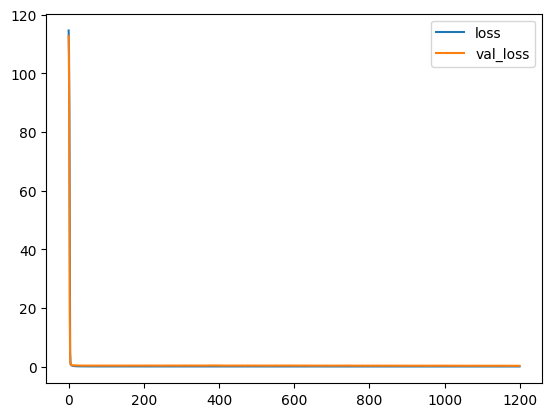

In [9]:
# let's use pandas for this (easy code)
# try to look if the model is actually training 
# => the error is going downwards
# if using validation data, you get two lines
# in this case, see if the lines follow a similar trend 
# (they don't always overlap with complex data, the trend is more important)
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [10]:
# compare the final model loss/evaluation values
print("Test data evaluation:")
print(model.evaluate(X_test_scaled, y_test_log, verbose=0))
print("\nTrain data evaluation:")
print(model.evaluate(X_train_scaled, y_train_log, verbose=0))

Test data evaluation:
0.20007392764091492

Train data evaluation:
0.01585472747683525


In [11]:
# get test predictions
test_predictions = model.predict(X_test_scaled)

# reshape the data for easier comparison table
test_predictions = np.expm1(test_predictions)
test_predictions = pd.Series(test_predictions.reshape(len(y_test),))
pred_df = pd.DataFrame(np.asarray(y_test), columns=['Test True Y'])
pred_df = pd.concat([pred_df, test_predictions], axis=1)
pred_df.columns = ['Test True Y', 'Model Predictions']

# print the comparison table - true values vs. model predicted values
# we can nicely see here how far off our model is in some cases
pred_df

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


,Test True Y,Model Predictions
0,52000.0,45417.714844
1,28000.0,27312.503906
2,46000.0,32757.080078
3,35000.0,37560.015625
4,85000.0,33564.343750
...,...,...
130,37100.0,54884.312500
131,49000.0,64464.589844
132,25500.0,28247.361328
133,37000.0,37762.589844


<Axes: xlabel='Test True Y', ylabel='Model Predictions'>

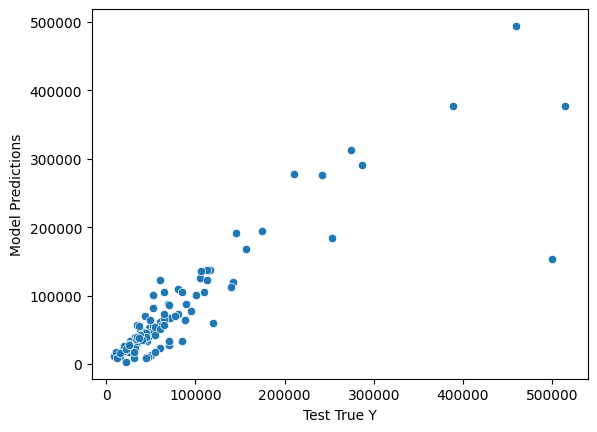

In [12]:
# these values follow a linear diagonal line = good predictions
# we basically compare the predicted values 
# to true test values and see the differences
sns.scatterplot(x='Test True Y', y='Model Predictions', data=pred_df)

In [13]:
# MAE - Mean average error
print("MAE")
print(round(metrics.mean_absolute_error(y_test, test_predictions), 2), "$")

# MSE - Mean square error
print("\nMSE")
print(round(metrics.mean_squared_error(y_test, test_predictions), 2), "$^2")

# RMSE - Root mean square error
print('\nRMSE:')
print(round(np.sqrt(metrics.mean_squared_error(y_test, test_predictions)), 2), "$")

# R-squared. 0 = the model descibes the dataset poorly
# 1 = model describes the dataset perfectly
print('\nR-squared:')
print(round(metrics.r2_score(y_test, test_predictions), 2))

# Explained Variance Score => 0 = the model descibes the dataset poorly
# 1 = model describes the dataset perfectly
# high variance score = model is a good fit for the data 
# low variance score = model is not a good fit for the data
# the higher the score, the model is more able to explain the variation in the data
# if score is low, we might need more and better data
print("\nExplained variance score:")
print(round(metrics.explained_variance_score(y_test, test_predictions), 2))

MAE
16153.94 $

MSE
1427239647.54 $^2

RMSE:
37778.83 $

R-squared:
0.8

Explained variance score:
0.81


C:\Users\Administrateur\AppData\Local\Temp\ipykernel_21456\3124900743.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - test_predictions))


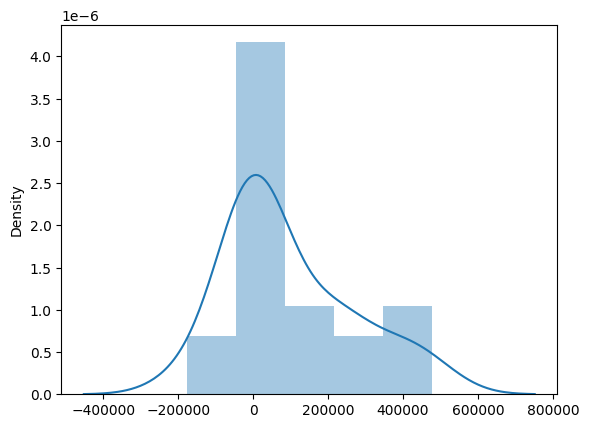

In [14]:
# if the prediction distribution are far from normal distribution
# then the model is not probably good enough
# distplot is deprecating in future pandas-version
# unfortunately, there's no exact alternative to do this plot at the moment
sns.distplot((y_test - test_predictions))
plt.show()
plt.close()

In [15]:
df.columns

Index(['Total Speed in km/h', 'CC/Battery Capacity in cc', 'HorsePower',
       'Seats', 'Performance(0 - 100 )KM/H', 'Torque', 'Cars Prices',
       'Fuel Types_CNG/Petrol', 'Fuel Types_Diesel', 'Fuel Types_Electric',
       ...
       'Company Names_Mercedes', 'Company Names_Nissan',
       'Company Names_Peugeot', 'Company Names_Porsche',
       'Company Names_Rolls Royce', 'Company Names_Tata Motors',
       'Company Names_Tesla', 'Company Names_Toyota',
       'Company Names_Volkswagen', 'Company Names_Volvo'],
      dtype='object', length=251)

#### Trying the model in practice with new imaginary cars, I kept the AI test from my previous file

In [16]:
train = 0.7
validation = 0.15
test = 0.15
X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=train, random_state=42)
relative_val_test_size = test / (test + validation)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=relative_val_test_size, random_state=42)
print(f"Training set: {X_train.shape}, {y_train.shape}")

Training set: (629, 250), (629,)


In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras

# ----------------------------
# Step 0: Define your imaginary cars
# ----------------------------
imaginary_cars = pd.DataFrame([
    {'Total Speed in km/h': 320, 'CC/Battery Capacity in cc': 4000, 'HorsePower': 700,
     'Seats': 2, 'Performance(0 - 100 )KM/H': 3.0, 'Torque': 750, 'Cars Prices': 0,
     'Fuel Types': 'Petrol', 'Engines': 'V8', 'Company Names': 'BMW'},
    
    {'Total Speed in km/h': 250, 'CC/Battery Capacity in cc': 5000, 'HorsePower': 600,
     'Seats': 4, 'Performance(0 - 100 )KM/H': 4.0, 'Torque': 600, 'Cars Prices': 0,
     'Fuel Types': 'Hybrid', 'Engines': 'V6', 'Company Names': 'Audi'},
    
    {'Total Speed in km/h': 280, 'CC/Battery Capacity in cc': 3000, 'HorsePower': 650,
     'Seats': 2, 'Performance(0 - 100 )KM/H': 3.5, 'Torque': 700, 'Cars Prices': 0,
     'Fuel Types': 'Petrol', 'Engines': 'V8', 'Company Names': 'Ferrari'}
])

# ----------------------------
# Step 1: Categorical Encoding
# ----------------------------
categorical_cols = ['Fuel Types', 'Engines', 'Company Names']
imaginary_cars_encoded = pd.get_dummies(imaginary_cars, columns=categorical_cols)

# ----------------------------
# Step 2: Align columns with training data
# ----------------------------
training_columns = X_train.columns  # X_train after preprocessing including one-hot
for col in training_columns:
    if col not in imaginary_cars_encoded.columns:
        imaginary_cars_encoded[col] = 0

# Reorder columns exactly like training data
imaginary_cars_encoded = imaginary_cars_encoded[training_columns]

# ----------------------------
# Step 3: Scale numerical columns
# ----------------------------
# Identify numeric columns in X_train (you scaled them before)
numeric_cols = ['Total Speed in km/h', 'CC/Battery Capacity in cc', 'HorsePower',
                'Seats', 'Performance(0 - 100 )KM/H', 'Torque']  # exclude target

imaginary_cars_scaled = X_scaler.transform(imaginary_cars_encoded)

# ----------------------------
# Step 4: Predict with trained model
# ----------------------------
y_pred_scaled = model.predict(imaginary_cars_scaled)

# Reverse log transformation to get actual price
predicted_prices = np.expm1(y_pred_scaled)

pred_df = pd.DataFrame(predicted_prices, columns=['Predicted Car Price'])

# ----------------------------
# Step 5: Output
# ----------------------------
pred_df = pd.DataFrame(predicted_prices, columns=['Predicted Car Price'])
print(pred_df)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step

C:\Users\Administrateur\AppData\Local\Temp\ipykernel_21456\1358472983.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  imaginary_cars_encoded[col] = 0
C:\Users\Administrateur\AppData\Local\Temp\ipykernel_21456\1358472983.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  imaginary_cars_encoded[col] = 0
C:\Users\Administrateur\AppData\Local\Temp\ipykernel_21456\1358472983.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
   Predicted Car Price
0         57762.496094
1         94566.796875
2        203947.375000
